In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [135]:
data=pd.read_csv("insurance.csv")

In [136]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [137]:
data["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

Text(0, 0.5, 'Number')

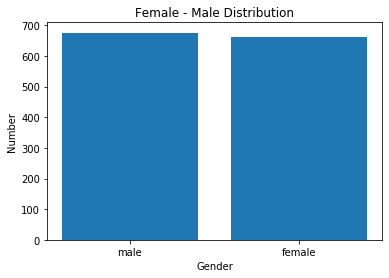

In [138]:

# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
sex = data['sex'].value_counts() 
# get x and y data 
points = sex.index 
frequency = sex.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Female - Male Distribution') 
ax.set_xlabel('Gender') 
ax.set_ylabel('Number')

In [139]:
X=data.iloc[:, :-1].values

In [140]:
y=data.iloc[:, 6]

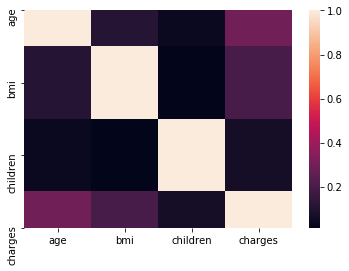

In [141]:
sns.heatmap(data.corr())

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = columnTransformer.fit_transform(X)



In [152]:
X[:5]

array([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 19, 27.9, 0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 18, 33.77, 1],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0, 3],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 33, 22.705, 0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32, 28.88, 0]],
      dtype=object)

In [154]:
# Avoid dummy variable trap by deleting first column of each category after encoding
X=X[:, [1,3,5,6,7,8,9,10]]

In [159]:
X[:5]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 19, 27.9, 0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 18, 33.77, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0, 3],
       [1.0, 0.0, 1.0, 0.0, 0.0, 33, 22.705, 0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 32, 28.88, 0]], dtype=object)

In [158]:
# Splitting the data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [161]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_pred=regressor.predict(X_test)
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [163]:
print(regressor.coef_)

[-1.54637279e+01  2.36050173e+04 -2.60132732e+02 -9.13278834e+02
 -7.61948706e+02  2.53700500e+02  3.35962814e+02  4.36910121e+02]


In [164]:
print(regressor.intercept_)

-11828.073537474536


In [165]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680431